# 20250922 PCA_from_scratch

## 1. Generate data from $N_2\left(0, \left(\begin{matrix}1&0.8\\0.8&1\end{matrix}\right)\right)$


*Created by Huei-Wen Teng on 20241201, last modified 20250922*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

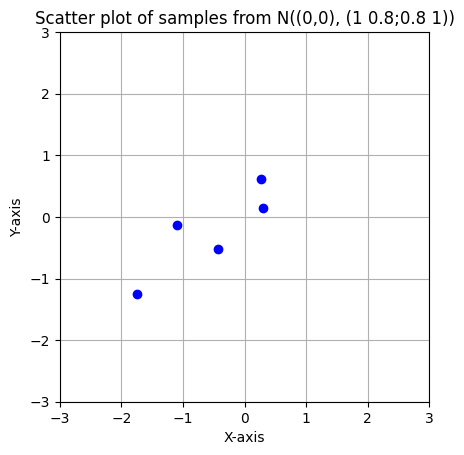

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n = 5

# Mean vector
mean = [0, 0]

# Covariance matrix
covariance = [[1, 0.8], [0.8, 1]]

# Generate samples
samples = np.random.multivariate_normal(mean, covariance, n)

# Scatter plot
plt.scatter(samples[:, 0], samples[:, 1], color='blue', marker='o')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter plot of samples from N((0,0), (1 0.8;0.8 1))')
plt.grid(True)

lims = [-3, 3]
plt.xlim(lims)
plt.ylim(lims)

# Set equal scaling and square-shaped plot
plt.gca().set_aspect('equal', adjustable='box')

# Display the plot
plt.show()

## 2. Procedures of PCA using eigen-decomposition

Now we do the following to implement the PCA

1. Recode $X$ as samples 
2. Standardize $X$ to have zero column mean.
3. Find the eigendecomposition of $X^TX$, find the eigen vector and eigenvalues
4. Calculate the first principle component $Z_1$ and the second principle components $Z_2$
5. Plot $Z_1$ versus $Z_2$
6. Provide the bi-plot

- The @ operator was introduced in Python 3.5 as a way to perform matrix multiplication using a clean and intuitive syntax.
- It is equivalent to using numpy.matmul() or the dot method from the numpy library, such as np.dot(X, eigenvectors).
- This operator is specifically used when dealing with linear algebra operations, such as calculating principal components, transformations, and other matrix-based computations.

$X$ needs to be centered! 

In [5]:
samples.mean(axis=0)

array([-0.53888921, -0.22764224])

In [6]:
X_centered = samples - samples.mean(axis=0)
print(X_centered.mean(axis=0))
X = X_centered.copy()
print(X.mean(axis=0))

[0.0000000e+00 4.4408921e-17]
[0.0000000e+00 4.4408921e-17]


In [7]:
# 1. From samples: subtract the mean of each column from the respective column
X_centered = samples - samples.mean(axis=0)

# 2. Recode samples (data) as X
X = X_centered.copy()

# 3. Standardize $X$ to have zero column mean.
n_cov = result = X.T @ X
print('T(X)X')
print(n_cov)
eigenvalues, eigenvectors = np.linalg.eig(n_cov)


# However, the eigen values are not sorted. So, we need the following steps:
# Sort the eigenvalues in descending order and get the indices
sorted_indices = np.argsort(eigenvalues)[::-1]

# Reorder eigenvalues and eigenvectors using the sorted indices
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]


print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)


# 4. Calculate the first principle commponent $Z_1$ and the second princple component $Z_2$
Z = X @ eigenvectors 
print('\nPricinple components:')
print(Z);

T(X)X
[[3.12540768 2.15077706]
 [2.15077706 2.00252687]]
Eigenvalues:
[4.78681619 0.34111836]

Eigenvectors:
[[ 0.7913839  -0.61131949]
 [ 0.61131949  0.7913839 ]]

Pricinple components:
[[-0.08748475 -0.29546224]
 [-0.38298593  0.4156542 ]
 [ 0.89055534 -0.21313905]
 [-1.5795605  -0.07863477]
 [ 1.15947583  0.17158186]]


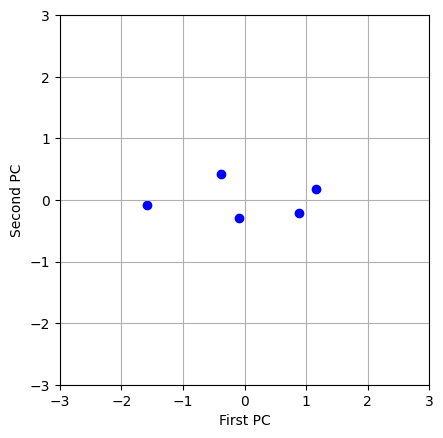

In [8]:
# Scatter plot
plt.scatter(Z[:, 0], Z[:, 1], color='blue', marker='o')
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.grid(True)

# Set x and y limits to be the same for a squared plot
plt.xlim(lims)
plt.ylim(lims)

# Set equal scaling and square-shaped plot
plt.gca().set_aspect('equal', adjustable='box')

# Display the plot
plt.show()

## 3. Eigendecomposition versus Singular Value Decomposition (SVD)

In [7]:
U, S, Vt = np.linalg.svd(X)

print("U (left singular vectors):")
print(U)

print("\nS (singular values):")
print(S)

print("\nVt (right singular vectors):")
print(Vt)

U (left singular vectors):
[[-1.74024174e-01 -3.69246118e-02  1.49720729e-02 -4.92223420e-01
   6.13904588e-02  8.13428847e-02 -7.66402509e-02  4.21339511e-01
   2.11830130e-01  2.20698324e-01 -4.40549651e-01 -4.03662409e-02
   9.06928643e-02  2.47526183e-01  1.14377694e-01  6.87881056e-02
  -2.65148409e-02 -2.46983090e-01 -6.67811528e-02  2.98819146e-01]
 [-2.10009975e-01 -4.06970801e-01 -5.70193001e-03 -2.23221954e-01
  -1.71787807e-01  4.42945366e-02  3.53411162e-01  6.69834468e-02
  -1.21997566e-01  2.47862968e-01 -1.01820373e-02  2.48987145e-01
  -7.91628301e-02 -1.34948879e-01  7.21297897e-03 -4.52271304e-01
   1.70453592e-01  2.04093202e-01  3.63405570e-01 -9.63411864e-02]
 [ 1.50853125e-02 -5.14851173e-03  9.99768128e-01  4.43836541e-03
  -2.10160732e-03 -6.76037346e-04  3.70117302e-03 -4.76150639e-03
  -3.60106534e-03 -8.44069641e-04  5.44275671e-03  2.43675168e-03
  -1.75059846e-03 -4.14890197e-03 -1.37764088e-03 -4.36938455e-03
   1.65414055e-03  4.67828651e-03  3.65510544e-

Here's a breakdown of the output:

- **U**: Contains the orthogonal matrix of left singular vectors.
- **S**: Contains the singular values, which are non-negative and sorted in decreasing order. Note that `S` is returned as a 1D array of singular values, not a full diagonal matrix. You can convert it to a diagonal matrix using `np.diag(S)`, but you'll need to account for the shape if `X` isn't square.
- **Vt**: Contains the orthogonal matrix of right singular vectors.


Check if the squared singular value equals the eigenvalue: $\sigma_i^2=\lambda_i$? 

In [46]:
print('\nSqaured singular value:')
print(S**2)
print('\nEigenvalues:')
print(eigenvalues)


Sqaured singular value:
[26.82210963  4.07694765]

Eigenvalues:
[26.82210963  4.07694765]


Check if eigenvectors equal the right singular vectors.
Answer: They match, except for potential sign differences.

In [47]:
print('\nEigenvectors:')
print(eigenvectors)
print('\nRight singular vectors')
print(Vt)


Eigenvectors:
[[-0.69158359 -0.72229644]
 [-0.72229644  0.69158359]]

Right singular vectors
[[ 0.69158359  0.72229644]
 [ 0.72229644 -0.69158359]]


## 4. Check if the results are the same as "from sklearn.decomposition import PCA

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
type(X)

numpy.ndarray

In [11]:
df_X = pd.DataFrame(X, columns=['X1', 'X2'])


In [12]:
df_X.mean()

X1    0.000000e+00
X2    4.440892e-17
dtype: float64

Having scaled the data, we can then
perform principal components analysis using the `PCA()` transform
from the `sklearn.decomposition` package.

(By default, the `PCA()`  transform centers the variables to have
mean zero though it does not scale them.) The transform `pcaUS`
can be used to find the PCA
`scores` returned by `fit()`. Once the `fit` method has been called, the `pcaUS` object also contains a number of useful quantities.

In [13]:
# Create a PCA object first
pca = PCA()

# Then use the PCA object to fit the DataFrame
pca.fit(df_X)

PCA()

The scores can be computed using the `transform()` method
of `pcaUS` after it has been fit.

In [14]:
scores = pca.transform(df_X)

We will plot these scores a bit further down.
The `components_` attribute provides the principal component loadings:
each row of `pcaUS.components_` contains the corresponding
principal component loading vector.

Now, it is seen that the loadings are the same as what we calculate in Sections 2 and 3

In [61]:
pca.components_ 

array([[ 0.69158359,  0.72229644],
       [ 0.72229644, -0.69158359]])

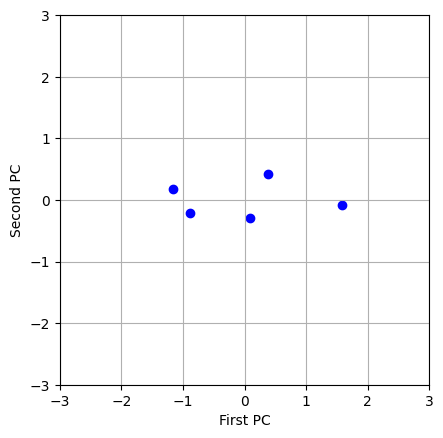

In [15]:
# Scatter plot
plt.scatter(scores[:, 0], scores[:, 1], color='blue', marker='o')
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.grid(True)

# Set x and y limits to be the same for a squared plot
plt.xlim(lims)
plt.ylim(lims)

# Set equal scaling and square-shaped plot
plt.gca().set_aspect('equal', adjustable='box')

# Display the plot
plt.show()